In [1]:
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib
import json
import glob
import pandas as pd

In [2]:

data_ff = glob.glob("baseline/CP_sparse/*.json")
data_cnn = glob.glob("lstm/cp_sparse/*.json")
#data_lstm = glob.glob("lstm/cp/sequ_6/*.json")
data_names = [data_ff, data_cnn]


In [7]:
cnn_data, ff_data, lstm_data = [],[],[]
steps_1, steps_2 = [],[]
for name in data_cnn:
    with open(name) as json_file:
        data_i = json.load(json_file)
    data_i = np.array(data_i)
    cnn_data.append(list(data_i[:,2]))
    steps_1.append(list(data_i[:,1]))
for name in data_ff:
    with open(name) as json_file:
        data_i = json.load(json_file)
    data_i = np.array(data_i)
    ff_data.append(list(data_i[:,2]))
    steps_2.append(list(data_i[:,1]))

In [4]:

ff_time = np.array(steps_2, dtype=float).flatten()
ff_values = np.array(ff_data).flatten()
lstm_values = np.array(cnn_data).flatten()
lstm_time = np.array(steps_1, dtype=float).flatten()

In [5]:
#pd.set_option('display.float_format', '{:.2E}'.format)
#y_label = 'Mean Reward (10 episodes)'
d = {'Environment Steps': ff_time, 'Mean Reward (10 episodes)':ff_values}
data_1 = pd.DataFrame(data=d)
d2 = {'Environment Steps': lstm_time, 'Mean Reward (10 episodes)':lstm_values}
data_2 = pd.DataFrame(data=d2)

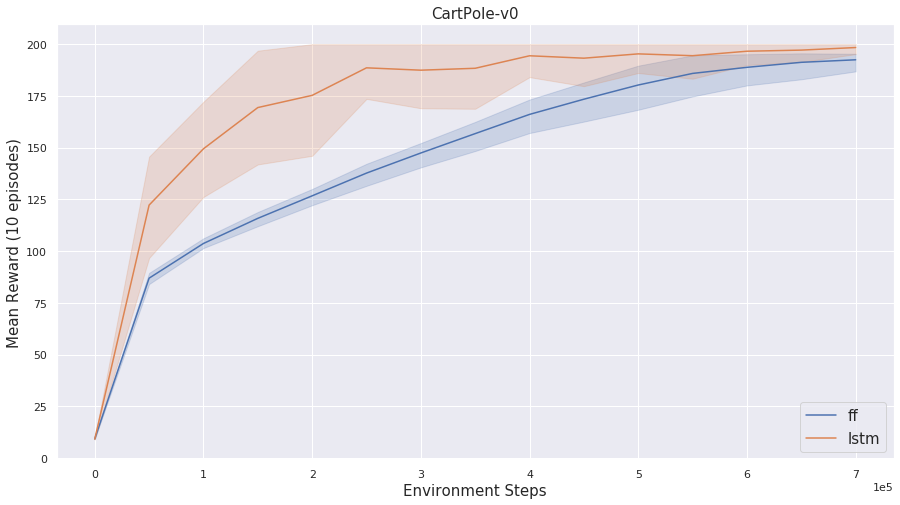

In [6]:
fig = plt.figure(figsize=(15,8))

plt.ticklabel_format(style='sci', axis='x',useOffset=False, scilimits=(0,0))
ax = sns.lineplot(x='Environment Steps', y='Mean Reward (10 episodes)',data=data_1,label="ff")
ax = sns.lineplot(x='Environment Steps', y='Mean Reward (10 episodes)',data=data_2,label="lstm")
# Set the title to Comic Sans


plt.title("CartPoleSparse-v0", fontsize=15)
ax.yaxis.label.set_size(15)
ax.xaxis.label.set_size(15)

plt.legend(loc='lower right',fontsize=15)
#plt.savefig("Upside_down_LSTM_seq6_CartPole_5seeds.png", dpi=300)
plt.show()
